___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 8: Unsupervised learning

## Lab work 8



#### Мета: 

* навчитися використовувати моделі без учителем

### Завдання 1:

Опрацюйте файл `Groceries.csv`. Використовуючи алгоритм асоціативних зв'язків, знайдіть:
- зробіть описову статистику даного файлу
- ведіть топ-3 продукти, що продаються
- виведіть топ-2 пари продуктів, що продаються
- придумайте, як отриману інформацію можна використатти (опишіть в 3-4 реченнях)

In [37]:
import pandas as pd

df = pd.read_csv('groceries.csv')


### Stats

In [91]:
print('###Columns:')
print(df.columns)
print('###Shape:')
print(df.shape)
print('###Describe:')
print(df.describe())

###Columns:
Index(['Item(s)', 'Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6',
       'Item 7', 'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12',
       'Item 13', 'Item 14', 'Item 15', 'Item 16', 'Item 17', 'Item 18',
       'Item 19', 'Item 20', 'Item 21', 'Item 22', 'Item 23', 'Item 24',
       'Item 25', 'Item 26', 'Item 27', 'Item 28', 'Item 29', 'Item 30',
       'Item 31', 'Item 32'],
      dtype='object')
###Shape:
(9835, 33)
###Describe:
           Item(s)
count  9835.000000
mean      4.409456
std       3.589385
min       1.000000
25%       2.000000
50%       3.000000
75%       6.000000
max      32.000000


In [39]:
df['Items'] = df.iloc[:, 1:].apply(lambda x: ' , '.join(x.dropna()), axis=1)

clean_items = df['Items'].str.split(',').explode().str.strip()

print('###Top 3 products:')
print(clean_items.value_counts().head(3))


###Top 3 products:
whole milk          2513
other vegetables    1903
rolls/buns          1809
Name: Items, dtype: int64


In [94]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

data = df.values.tolist()
data = [[x for x in row if str(x) != 'nan'] for row in data]

# at the first index data has length of all items, we want to remove it
data = [row[1:] for row in data]
# print(data)
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df_formatted = pd.DataFrame(te_ary, columns=te.columns_)

df_formatted.to_csv('groceries_formatted.csv', index=False)

# max_len=2 in order to get pairs, most products we already had without any ML
frequent_itemsets = apriori(df_formatted, min_support=0.05, use_colnames=True, max_len=5)
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

print("Most Frequent Itemsets:")
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets[frequent_itemsets['length'] > 1])
frequent_itemsets.to_csv('frequent_itemsets.csv', index=False)

# Print association rules
print("\nAssociation Rules:")
rules.to_csv('association_rules.csv', index=False)
rules.head()

Most Frequent Itemsets:
     support                        itemsets  length
28  0.074835  (other vegetables, whole milk)       2
29  0.056634        (rolls/buns, whole milk)       2
30  0.056024            (yogurt, whole milk)       2

Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,0.420750
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548,0.455803
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696,0.208496
3,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452,0.228543
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132,0.422732


Із результатів моделі ми бачимо що самий популярний продукт це пастеризоване молоко

Воно часто попадається в парі з овочами, булочками та йогуртами.
Можна було би проводити експеримент далі, та перевіряти самі популярніші продукти в парі без молока. Але у такому випадку сильно малі метрики support, lift і іншого.

Мені не хоітлося вибирати інщі продукти, бо по моїм відчуттям у них дуже низькі метрики, і вони не будуть показовими.

Так-як завдання було вивести пари 2-х продуктів то ось висновок:
Самі топові продукти це:
- Овочі + Пастеризоване молоко - тут найбільша підтримка
- Пастеризоване молоко + булочки
- Пастеризоване молоко + йогурти

З цього слідує:
Можна робити акції, наприклад продавати молоко + якись продукт який вже давно лежить на складі, який треба продати. Так-як людям потрібне молоко вони використають знижку на нього + куплять продукт від якого треба здихатися.

Такий трюк також можна спробувати з овочами, булочками та йогуртами.

Також як варіант можна побачити які марки молока купують найчастіше, і замовляти їх більше, або навіть робити акції на них.
Це саме можна зробит из овочами, подивитися які купують найбільше і моєливо відмовитися від тих які найменьше.

Ще 1 висновок, так-як люди полюбляють булочки, а всі люди люблять щоб булочки були свіжими, можна робити рекламу, наприклад що свіжі булочки продаються в стільки то годин, і щоб люди в цей час приходили частіше щоб купити свіже, а у вечері продавати булочки по меньшій ціні, щоб не викидати їх.










### Завдання 2:

Завантажте файл https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
 
- Спробуйте провести кластеризацію, тобто виділити цільові групи, для яких можна впроваджувати певні маркетингові акції
- Опишіть отримані результати

In [100]:
import numpy as np                ## linear algebra
import pandas as pd               ## data processing, dataset file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   ## data visualization & graphical plotting
import seaborn as sns             ## to visualize random distributions

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

import warnings                    ## Filter warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Mall_Customers.csv')

# Drop CustomerID column I think it's redunant
df = df.drop(columns=['CustomerID'])

# Rename columns
df.rename(columns = {'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Score'}, inplace=True)

print(df.head(15))


    Gender  Age  Income  Score
0     Male   19      15     39
1     Male   21      15     81
2   Female   20      16      6
3   Female   23      16     77
4   Female   31      17     40
5   Female   22      17     76
6   Female   35      18      6
7   Female   23      18     94
8     Male   64      19      3
9   Female   30      19     72
10    Male   67      19     14
11  Female   35      19     99
12  Female   58      20     15
13  Female   24      20     77
14    Male   37      20     13


### Check pecentange of genders

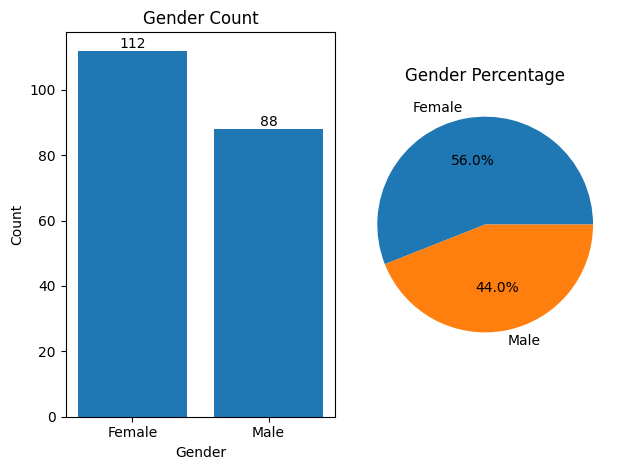

In [104]:
gender_counts = df['Gender'].value_counts()
total = gender_counts.sum()


gender_counts = df['Gender'].value_counts()

# Create the count plot
plt.subplot(1, 2, 1)
bars = plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Count')

# Add count values to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')


# Calculate the percentage
gender_percentages = gender_counts / gender_counts.sum() * 100

# Create the percentage pie chart
plt.subplot(1, 2, 2)
plt.pie(gender_percentages, labels=gender_percentages.index, autopct='%1.1f%%')
plt.title('Gender Percentage')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()

### Get average age for each gender

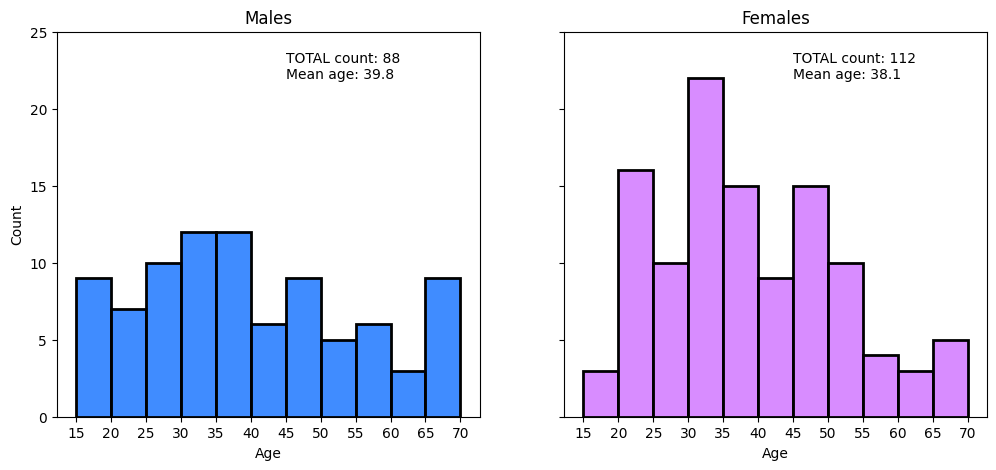

In [112]:
from sklearn.calibration import LabelEncoder

le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)


# Filter data by gender
males_age = df.loc[df['Gender'] == 1, 'Age']
females_age = df.loc[df['Gender'] == 0, 'Age']

age_bins = range(15, 75, 5)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot males histogram
sns.histplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, edgecolor="k", linewidth=2)
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45, 23, f"TOTAL count: {males_age.count()}")
ax1.text(45, 22, f"Mean age: {males_age.mean():.1f}")

# Plot females histogram
sns.histplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, edgecolor="k", linewidth=2)
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45, 23, f"TOTAL count: {females_age.count()}")
ax2.text(45, 22, f"Mean age: {females_age.mean():.1f}")

plt.show()

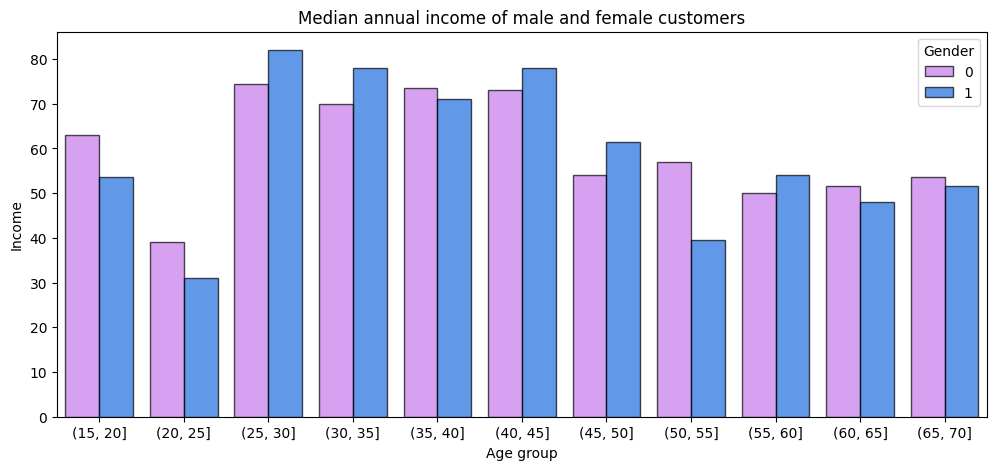

In [114]:
medians_by_age_group = df.groupby(["Gender",pd.cut(df['Age'], age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender', 'Age_group'])
medians_by_age_group.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Income', hue='Gender', data=medians_by_age_group,
            palette=['#cc66ff','#0066ff'],
            alpha=0.7,edgecolor='k',
            ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

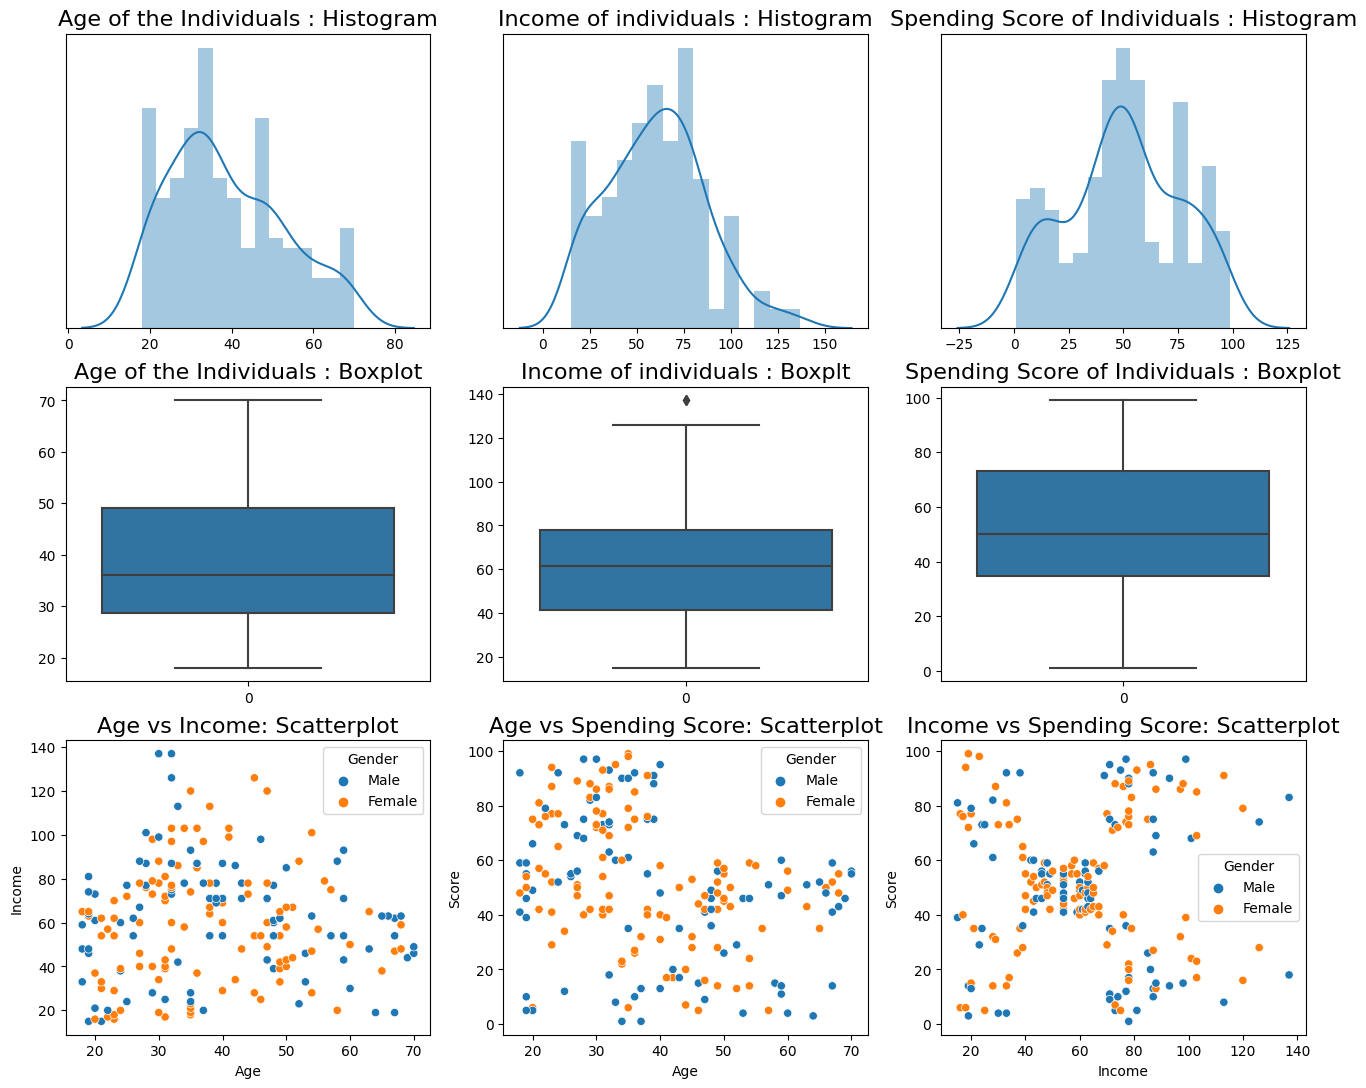

In [108]:
## Let's understand the patterns and trends in the numerical variables
## Age, Income(k$/yr), and SpendScore(1-100) are the 3 numerical variables we have here

plt.subplots(figsize=(16,13))

plt.subplot(3,3,1)
plt.title('Age of the Individuals : Histogram', fontsize=16)
sns.distplot(df['Age'], bins=15)
plt.ylabel(None)
plt.yticks([])
plt.xlabel(None)

plt.subplot(3,3,2)
plt.title('Income of individuals : Histogram', fontsize=16)
sns.distplot(df['Income'], bins=15)
plt.ylabel(None)
plt.yticks([])
plt.xlabel(None)

plt.subplot(3,3,3)
plt.title('Spending Score of Individuals : Histogram', fontsize=16)
sns.distplot(df['Score'], bins=15)
plt.ylabel(None)
plt.yticks([])
plt.xlabel(None)

plt.subplot(3,3,4)
plt.title('Age of the Individuals : Boxplot', fontsize=16)
sns.boxplot(df['Age'])
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(3,3,5)
plt.title('Income of individuals : Boxplt', fontsize=16)
sns.boxplot(df['Income'])
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(3,3,6)
plt.title('Spending Score of Individuals : Boxplot', fontsize=16)
sns.boxplot(df['Score'])
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(3,3,7)
plt.title('Age vs Income: Scatterplot', fontsize=16)
sns.scatterplot(data=df, x='Age', y='Income', hue='Gender')

plt.subplot(3,3,8)
plt.title('Age vs Spending Score: Scatterplot', fontsize=16)
sns.scatterplot(data=df, x='Age', y='Score', hue='Gender')

plt.subplot(3,3,9)
plt.title('Income vs Spending Score: Scatterplot', fontsize=16)
sns.scatterplot(data=df, x='Income', y='Score', hue='Gender')

plt.show()

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

We can see normal distribution on the spending score

As we can see from previous graphs the age, gender and income always almost same, and they are not so important for us.
So for the clusters it's better to split customers by they spending score and income. 

So lets get spending score and income as our features and create cluster analysis for them.



In [115]:
X = df[['Income', 'Score']].copy()

## Scale the features

scaler = StandardScaler()
X_kmeans =  scaler.fit_transform(X)

Before create cluster analyze let's calculate optimal numbers of clusters

In [127]:
from kneed import KneeLocator

## Applying the elbow method to determine the number of clusters

wcss = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 42)
    kmeans.fit(X_kmeans)
    wcss.append(kmeans.inertia_)

## Knee
kl = KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")
print('The Knee located at figure:', kl.elbow)

The Knee located at figure: 5


As we can see from previous method 5 is optimal numbers of clusters

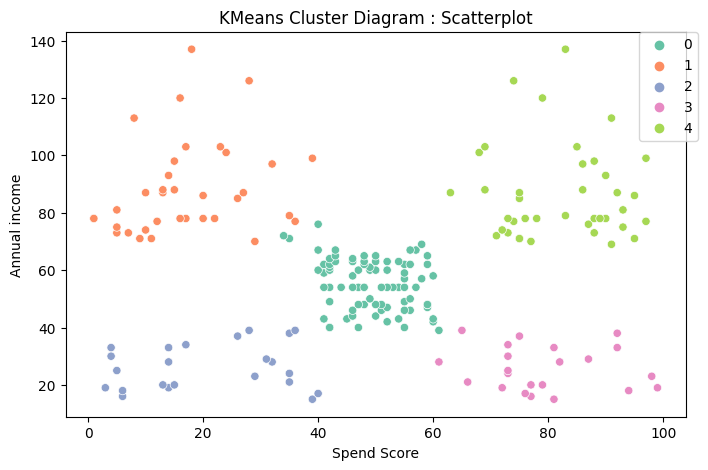

In [133]:
clusters = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = clusters.fit_predict(X_kmeans)

## Creating a New Dataframe with an appended cluster column

df_Kmeans = df.copy()            ## making a copy of original dataframe
df_Kmeans['Cluster'] = y_kmeans  ## appending the cluster column

plt.figure(figsize=(8,5))
plt.title('KMeans Cluster Diagram : Scatterplot')
sns.scatterplot(data=df_Kmeans, x='Score', y='Income', hue='Cluster', palette="Set2")

plt.xlabel('Spend Score')
plt.ylabel('Annual income')


plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()

## lets get info about each cluster

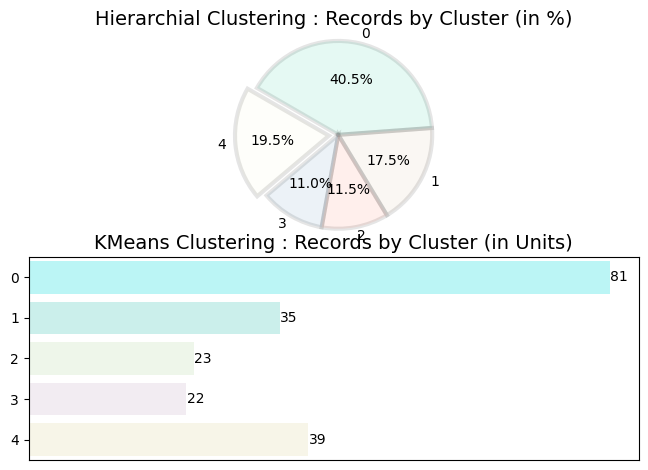

In [146]:
# Creating a New Dataframe with an appended cluster column

df_Hierar = df.copy()  # making a copy of original dataframe
df_Hierar['Cluster'] = y_kmeans  # appending the cluster column

my_pal = ('#00FFFF', '#40E0D0', '#c7e9b4', '#D8BFD8', '#EEE8AA')
my_col = ('#00C78C', '#D2B48C', '#FF6347', '#4682B4', '#FAFAD2')

plt.subplot(2, 1, 1)
my_xpl = [0.0, 0.0, 0.0, 0.0, 0.1]
plt.title('Hierarchial Clustering : Records by Cluster (in %)', fontsize=14)
sizes = df_Hierar['Cluster'].value_counts().sort_index(
) / df_Hierar['Cluster'].value_counts().sum()*100
labels = sizes.index
plt.pie(sizes, labels=labels, colors=my_col, explode=my_xpl, counterclock=False, startangle=150, wedgeprops={
        'alpha': 0.1, 'edgecolor': 'black', 'linewidth': 3, 'antialiased': True}, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()

plt.subplot(2, 1, 2)
plt.title('KMeans Clustering : Records by Cluster (in Units)', fontsize=14)
my_ord = [0, 1, 2, 3, 4]
ax = sns.countplot(y="Cluster", data=df_Kmeans,
                   palette=my_pal, order=my_ord, alpha=0.3)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()),
                (p.get_x() + p.get_width() + 0.05, p.get_y()+0.5))
plt.ylabel(None)
plt.xlabel(None)
plt.xticks([])

plt.show()


# Результати

отже у нас вийшло 5 кластерів.
Для фіч ми брали лише дохід і рейтинг.

По візуалізаціям було видно, що:
Вік та стать особо ролі не грають були якісь відхилення але вони не мали нормального розподілу як це мав дохід, тому виходить що в цілому люди ходять в торговий центр приблизно однаково.


Тому я вирішив взяти і просто поділити людей по групам того як вони тратять гроші, і вийшли такі групи:

За допомогою elbow method (ліктьового метода) ми знайшли 5 груп

- група 1: люди з середнім доходом які купляють не багато і не мало(порівняно з іншими) - їх є найбільше(40.5%)

- група 2: Люди з високим доходом що купують мало - (17.5%)

- група 3: люди з малим доходом і ті що мало купують (11%)

- група 4: люди що купують багато і з малим доходом (11.5%)

- група 5: люди з високим доходом які багато купують - (19%)

